Let's import the necessary libraries and qiskit as usual.

In [29]:
# import numpy as np
import numpy as np
# import matplotlib
#import matplotlib
import matplotlib.pyplot as plt

# Import qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter
from qiskit.quantum_info import partial_trace, Statevector

from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram




### Entanglement

Entanglement is a fundamental concept in quantum mechanics. It is a phenomenon where two or more qubits are correlated in such a way that the state of one qubit is coupled with the state of the other qubit. In other words, measuring one qubit will instantly determine the state of the other qubit, regardless of the distance between them. This is a simple definition of entanglement. However, a more precise definition of entanglement will come later in the upcoming tutorials.

We can create entanglement using quantum gates and a minimum of two qubits. The most common gate used to create entanglement is the CNOT gate. The CNOT gate is a two-qubit gate that flips the target qubit if the control qubit is in the state $|1\rangle$. The CNOT gate is also known as the controlled-X gate.

To create entanglement, we can apply the CNOT gate to two qubits. The control qubit will be the first qubit, and the target qubit will be the second qubit. We can then measure the qubits to see if they are entangled.



Let's create a quantum circuit of two qubits and two classical bits. Apply two Hadamard gates, one to the first qubit and the other to the second qubit. Let's look at the statevector of the qubits after applying the Hadamard gates.

#### A typical statevector of a quantum circuit of two qubits

Let's create a quantum circuit with two qubits, apply a Hadamard gate to the first qubit, and then apply the CNOT gate to the qubits in which the first qubit is the control qubit and the second qubit is the target qubit. Finally, we will measure the qubits and simulate the quantum circuit using Qiskit.


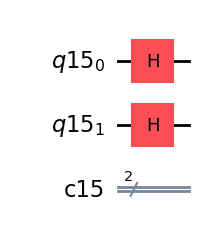

In [30]:
# Create a quantum circuit of two qubits 
qreg =  QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg,creg)

# Apply a Hadamard gate on the first qubit
qc.h(qreg[0])

# Apply a Hadamard gate on the second qubit
qc.h(qreg[1])

# Plot the circuit 
qc.draw(output='mpl')

Let's print the statevector of the qubits after applying the Hadamard gates.

In [31]:
# print the statevector
state_vector = Statevector.from_instruction(qc)

#print(state_vector)
# print a table of the statevector
print(state_vector.data)

# make a list of the statevector basis states
basis_states = []
# for i in range(4):
#     basis_states.append(format(i, '02b'))
basis_states = ['00', '10', '01', '11']    # Little endian format

# print the list of basis states
print(basis_states)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
['00', '10', '01', '11']


In [32]:
# print a table of the basis states and the corresponding amplitudes
for i in range(4):
    print('|' + basis_states[i] + '>  '
          , state_vector.data[i])
    

|00>   (0.4999999999999999+0j)
|10>   (0.4999999999999999+0j)
|01>   (0.4999999999999999+0j)
|11>   (0.4999999999999999+0j)


We can also calculate the probabilities of the qubits being in the state $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$.

In [33]:
# print a table of the basis states and the corresponding amplitudes
for i in range(4):
    print('|' + basis_states[i] + '>  '
          , state_vector.data[i], '  ', np.abs(state_vector.data[i])**2)

|00>   (0.4999999999999999+0j)    0.2499999999999999
|10>   (0.4999999999999999+0j)    0.2499999999999999
|01>   (0.4999999999999999+0j)    0.2499999999999999
|11>   (0.4999999999999999+0j)    0.2499999999999999


We can also run the quantum circuit on a quantum simulator and plot the histogram of the results.

{'01 00': 233, '11 00': 270, '00 00': 246, '10 00': 275}


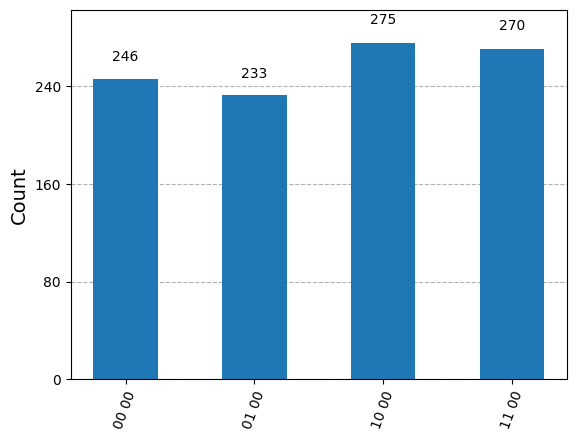

In [34]:
# Create a quantum circuit of two qubits 
qreg =  QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg,creg)

# Apply a Hadamard gate on the first qubit
qc.h(qreg[0])

# Apply a Hadamard gate on the second qubit
qc.h(qreg[1])

# Perform the measurements 
qc.measure_all()


# Specify the backend (the simulator)
simulator = BasicSimulator()

# Transpile the circuit for the simulator
compiled_qc = transpile(qc, simulator)

# Run the compiled circuit
job = simulator.run(compiled_qc)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())

CNOT gate is a two-qubit gate that flips the target qubit if the control qubit is in the state $|1\rangle$. The CNOT gate is also known as the controlled-X gate. It is represented by the following matrix:

$$
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

The CNOT gate flips the target qubit if the control qubit is in the state $|1\rangle$. The CNOT gate does nothing if the control qubit is in the state $|0\rangle$.

We use CNOT gate to create entanglement between two qubits. The control qubit will be the first qubit, and the target qubit will be the second qubit. We can then measure the qubits to see if they are entangled.

Let's play a bit with the CNOT gate and see how it works.

We can understand the action of the `CNOT` gate as follows. The Hadamard gate creates a superposition of the states |0> and |1> in the first qubit. The `CNOT` gate flips the state of the second qubit if the first qubit is in the state |1>. Hence, we have 50% probability of measuring the first qubit in state |0> and the second qubit in state |0>, and 50% probability of measuring the first qubit in state |1> and the second qubit in state |1>.

Let's now summarize the above explanation in the table below. It is called the truth table of the `CNOT` gate. 

Complete the table by filling the output column of measuring the second qubit. Note that, `CNOT` gate has the first qubit as the control qubit and the second qubit as the target qubit. 

|First qubit | Second qubit | Output |
|------------|--------------|--------|
|0           | 0            |        |
|0           | 1            |        |
|1           | 0            |        |
|1           | 1            |        |



Discuss with your teacher or classmates the results you have obtained.


====================================================================================================

Now, let's check the entanglement state.

Activity: 

Now, construct quantum circuit of 
- a quantum register of two qubits 
- a classical register two classical bits. 

Apply the following gates: 

- Hadamard gate to the first qubit 
- and the CNOT gate to the qubits where the first qubit is the control qubit and the second qubit is the target qubit.


Then, print the statevector of the qubits.

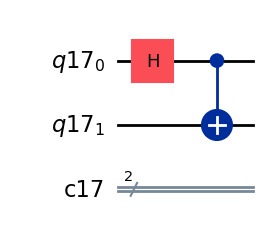

In [35]:
# Create a quantum circuit of two qubits and a classical register of two bits
qreg =  QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg,creg)

# apply a Hadamard gate on the first qubit
qc.h(qreg[0])

# apply CNOT gate with the first qubit as control and the second qubit as target
qc.cx(qreg[0], qreg[1])

# draw the circuit
qc.draw(output='mpl')

Let's have a peak at the statevector of the qubits.

In [36]:
# print the statevector
state_vector = Statevector.from_instruction(qc)

# print a table of the statevector
for i in range(4):
    print('|' + basis_states[i] + '>  '
          , state_vector.data[i], '  ', np.abs(state_vector.data[i])**2)

|00>   (0.7071067811865475+0j)    0.4999999999999999
|10>   0j    0.0
|01>   0j    0.0
|11>   (0.7071067811865475+0j)    0.4999999999999999


Activity: What do you observe from the statevector of the qubits?  What can you say about the entanglement state of the qubits?

====================================================================================================

Let's now simulate the quantum circuit using Qiskit and plot the histogram of the results.

{'11 00': 515, '00 00': 509}


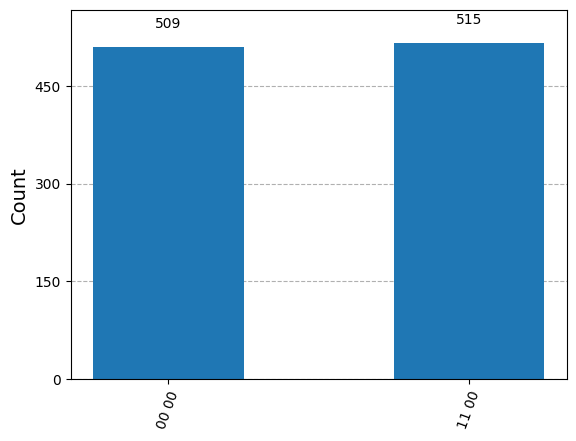

In [37]:
# Construct the circuit again 
qreg =  QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg,creg)

# Apply a Hadamard gate on the first qubit
qc.h(qreg[0])

# apply CNOT gate with the first qubit as control and the second qubit as target
qc.cx(qreg[0], qreg[1])

# Perform the measurements
qc.measure_all()

# Transpile the circuit for the simulator
compiled_qc = transpile(qc, simulator)

# Run the compiled circuit
job = simulator.run(compiled_qc)

# Get the result
result = job.result()

# Draw the circuit
qc.draw(output='mpl')

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())



====================================================================================================

Let's run the following code and analyze the results.

{'01': 509, '00': 515}


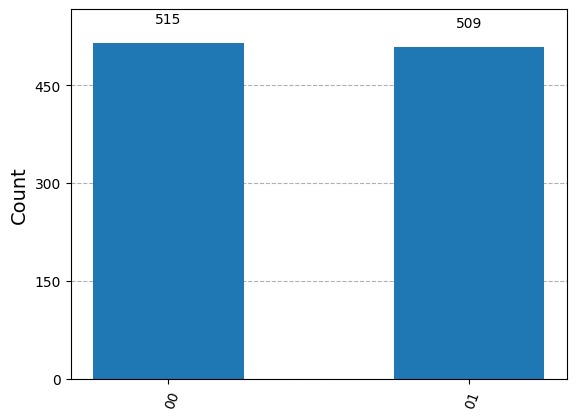

In [38]:

# Create a quantum register of two qubits
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)

# Apply H gate to the first qubit
qc.h(qreg[0])

# Apply CNOT gate
qc.cx(qreg[0], qreg[1])

qc.measure(qreg[0], creg[0])

# Specify the backend (the simulator)
simulator = BasicSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the compiled circuit
job = simulator.run(compiled_circuit)
#job = Sampler().run(qc, shots = 1024)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts())

# Draw the circuit
qc.draw(output='mpl')

# Plot the histogram
plot_histogram(result.get_counts())


#################################################


#### Bell States

The Bell states are a set of four maximally entangled quantum states. The Bell states are named after John Bell, who discovered them. 

Typically, for a quantum computer of two qubits, we have states like |00> and |01> and |00> and |10>. These called the basis of the qubit space or more percisely the computational basis of the qubit Hilbert space. 

We can represent the qubit space as a vector space with basis vectors:

|00>, 
|01>,
|10>,
|11>.

ince we have two qubits: each qubit has the possibility of being in the state |0> or |1>. Hence, we have 4 possible states: |00>, |01>, |10>, and |11>. These are the basis of the qubit space. Be careful now that the basis are arranged in a convention called the big-endian convention. This means that the first qubit is the most significant bit and the second qubit is the least significant bit. In other words we start counting qubits from the left to the right. This is important to remember when we are working with qubits since qiskit is using little-endian convention; the counting start from the right to the left.


Typically since the qubits are initialized in the state |0>, the state of the qubits is |00>. When apply a hadmard gate on the first qubit we put the first qubit in a superposition of the states |0> and |1>. 
Hence, the state of the qubits is now 

$$|q_1 q_2 > = \frac{1}{\sqrt{2}}[|00> + |10>]. $$

We notice that the second qubit stays zero or in the |0> state. This is because the Hadamard gate is applied to the first qubit only. 

Let's see what happens when we apply the Hadamard gate to the first qubit and the `CNOT` gate to the two qubits. The `CNOT` gate flips the state of the second qubit if the first qubit is in the state |1>. Then, the statevector of the qubits is

$$ |qq> = |00> + |11>. $$


Here, we see an interesting state, and Entangled state. This is called the Bell state. It is a superposition of the states |00> and |11>. It is a very important state in quantum computing, and it is used in many quantum algorithms and quantum communication protocols.



Activity: Create a quantum circuit with two qubits and two classical bits. Apply the Hadamard gate to the first qubit and the `CNOT` gate to the two qubits. Then measure each qubit simultaneously, run the circuit on the simulator, and see the results. Leverage the code that you have developed in the previous tasks.

You might use the following syntax to measure both qubits simultaneously:

```python

qc.measure(qreg, creg)

```

{'11': 525, '00': 499}


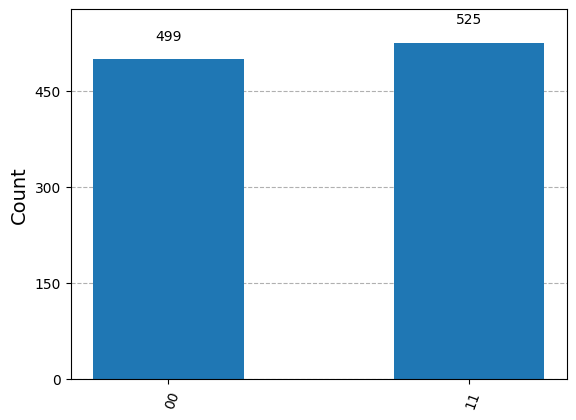

In [39]:
# Write your code here
#################################################

# Create a quantum register of 2 qubits
qreg = QuantumRegister(2)

# create a classical register of 2 bits
creg = ClassicalRegister(2)

# create a quantum circuit
qc = QuantumCircuit(qreg, creg)

# apply hadamard gate to the first qubit
qc.h(qreg[0])

#qc.h(qreg[1])

# Apply CNOT gate to the first and second qubit, where the 
# first qubit is the control qubit and the second qubit is the target qubit
qc.cx(qreg[0], qreg[1])

#qc.measure(qreg[0], creg[0])

qc.measure(qreg, creg)
# Specify the backend (the simulator)
simulator = BasicSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the compiled circuit
job = simulator.run(compiled_circuit)
#job = Sampler().run(qc, shots = 1024)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())

#################################################

We can achieve the entaglement by another group of gates. 

Create a quantum circuit of two qubits and two classical bits, apply the Puali-X gate to the second qubit, followed by a Hadamard gate on the first qubit, and then the `CNOT` gate to the two qubits. Then, measure all, run the circuit on the simulator, and see the results.

{'01': 512, '10': 512}


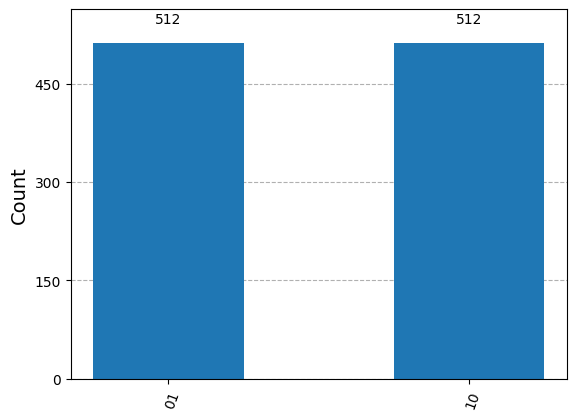

In [40]:
# Write your code here
#################################################

# Create a quantum register of 2 qubits
qreg = QuantumRegister(2)

# create a classical register of 2 bits
creg = ClassicalRegister(2)

# create a quantum circuit
qc = QuantumCircuit(qreg, creg)

# apply pauli-x gate to the seoncd qubit
qc.x(qreg[1])

# apply hadamard gate to the first qubit
qc.h(qreg[0])

# Apply CNOT gate to the first and second qubit, where the
# first qubit is the control qubit and the second qubit is the target qubit
qc.cx(qreg[0], qreg[1])

# measure the qubits
qc.measure(qreg, creg)

# Specify the backend (the simulator)
simulator = BasicSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the compiled circuit
job = simulator.run(compiled_circuit)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())